## Skin Detection Test

Need to find a reliable way to get only the skin pixels from an image (excluding the lips).

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_name = 'test5.png'

image = cv2.imread(image_name)

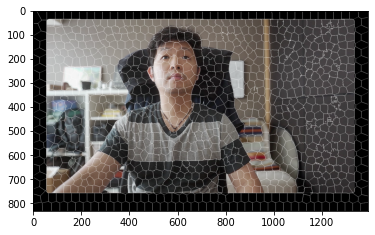

In [56]:
from cv2.ximgproc import createSuperpixelSLIC, SLICO

image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

cv_slic = createSuperpixelSLIC(image_lab, algorithm=SLICO, region_size=32)
cv_slic.iterate()

contour_mask = cv_slic.getLabelContourMask(thick_line=True)

image_with_contours = image.copy()
contour_locations = cv2.findNonZero(contour_mask)
for contour_location in contour_locations:
    image_with_contours[contour_location[0][1], contour_location[0][0]] = (255, 255, 255)

plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))

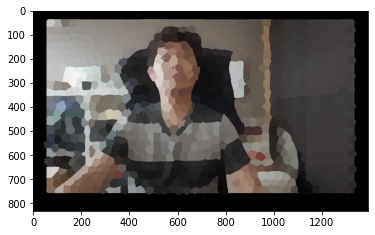

In [57]:
labels = cv_slic.getLabels()

image_slic = image.copy()
for i in range(cv_slic.getNumberOfSuperpixels()):
    superpixel_location = np.where(labels == i)
    pixels = np.zeros((superpixel_location[0].shape[0], 3), dtype=np.uint8)
    j = 0
    for x, y in zip(superpixel_location[1], superpixel_location[0]):
        pixels[j] = image_slic[y, x]
        j += 1
    # print(np.average(pixels[:, 0]), np.average(pixels[:, 1]), np.average(pixels[:, 2]))
    image_slic[labels == i] = (int(np.average(pixels[:, 0])), int(np.average(pixels[:, 1])), int(np.average(pixels[:, 2])))

    plt.imshow(cv2.cvtColor(image_slic, cv2.COLOR_BGR2RGB))


In [58]:
image = image_slic
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_y_cr_cb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

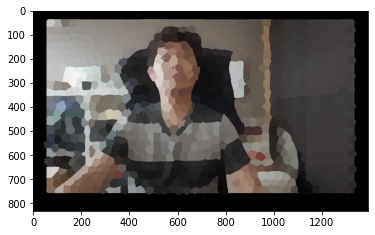

In [59]:
plt.imshow(image_rgb)

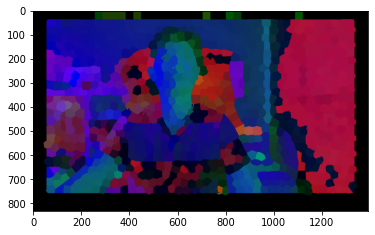

In [60]:
plt.imshow(image_hsv)

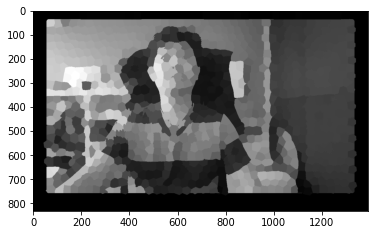

In [61]:
plt.imshow(image_hsv[:, :, 2], cmap='gray')

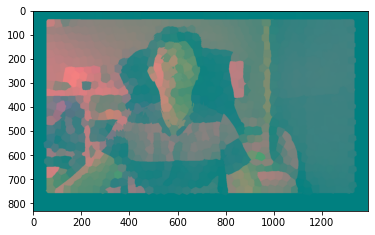

In [62]:
plt.imshow(image_y_cr_cb)

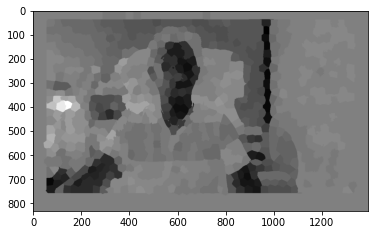

In [63]:
plt.imshow(image_y_cr_cb[:, :, 2], cmap='gray')

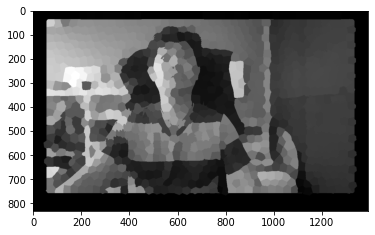

In [64]:
plt.imshow(image_gray, cmap='gray')

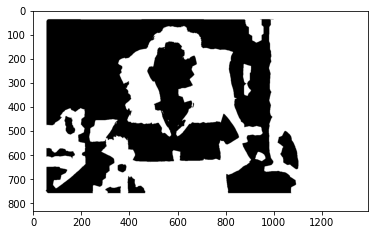

In [65]:
threshold_value, threshold_image = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(threshold_image, cmap='gray')


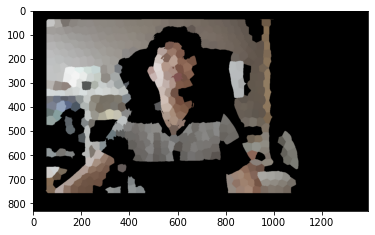

In [66]:
threshold_image_binary = 1 - threshold_image / 255
threshold_image_binary = np.repeat(threshold_image_binary[:, :, np.newaxis], 3, axis=2)
img_face_only = np.multiply(threshold_image_binary, image).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_face_only, cv2.COLOR_BGR2RGB))

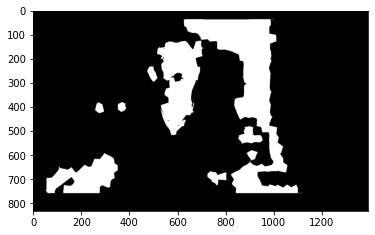

In [67]:
lower_hsv_values = np.array([10, 40, 0], dtype = "uint8")
upper_hsv_values = np.array([25, 200, 255], dtype = "uint8")

lower_y_cr_cb_values = np.array((0, 138, 67), dtype = "uint8")
upper_y_cr_cb_values = np.array((255, 150, 133), dtype = "uint8")

#A binary mask is returned. White pixels (255) represent pixels that fall into the upper/lower.
mask_y_cr_cb = cv2.inRange(image_y_cr_cb, lower_y_cr_cb_values, upper_y_cr_cb_values)
mask_hsv = cv2.inRange(image_hsv, lower_hsv_values, upper_hsv_values)

mask_skin_tone = cv2.add(mask_hsv, mask_y_cr_cb)

plt.imshow(mask_skin_tone, cmap='gray')

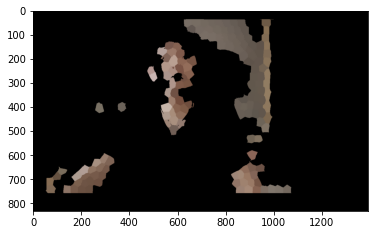

In [68]:
# combine two masks

img_combined = cv2.bitwise_and(img_face_only, img_face_only, mask = mask_skin_tone)
plt.imshow(cv2.cvtColor(img_combined, cv2.COLOR_BGR2RGB))